# Proyek Analisis Data: [Bike Sharing Dataset (Sumber)]
- **Nama:** [MUCH IVAN SURYA PUTRA MURDOKO]
- **Email:** [muchivan001@gmail.com]
- **ID Dicoding:** [muchivan]

## Menentukan Pertanyaan Bisnis

- Pertanyaan bisnis 1 : Rata-rata penyewaan sepeda per musim

- Pertanyaan bisnis 2 : Distribusi penyewaan berdasarkan cuaca

- Pertanyaan bisnis 3 : Trend penyewaan sepeda per hari

- Pertanyaan bisnis 4 : Distribusi penyewaan sepeda per jam

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Load datasets
day_df = pd.read_csv(r'D:\\learning\\data science\\DICODING EDITION\\submission\\data\\day.csv')
hour_df = pd.read_csv(r'D:\\learning\\data science\\DICODING EDITION\\submission\\data\\hour.csv')

# Preview datasets
print("Day Dataset:")
print(day_df.head())  # saya menggunakan print karna data.head() hanya menamilkan 5 data pertama dan data selanjutnya tidak di tampilkan

print("Hour Dataset:")
print(hour_df.head()) # saya menggunakan print karna data.head() hanya menamilkan 5 data pertama dan data selanjutnya tidak di tampilkan

Day Dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
Hour Dataset:

**Insight:**
- Terdapat dua dataset yang digunakan: day.csv dan hour.csv, yang menyimpan informasi tentang peminjaman sepeda per hari dan per jam.
- Dataset berisi informasi jumlah peminjaman sepeda berdasarkan hari dan jam, termasuk fitur seperti musim, cuaca, suhu, dan lainnya.

### Assessing Data

In [ ]:
# Check data types, missing values, and duplicates in day dataset
day_df.info()

day_df.describe()

day_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ada nilai kosong, dan semua kolom memiliki tipe data yang sesuai.

In [ ]:
# Check data types, missing values, and duplicates in hour dataset
hour_df.info()

hour_df.describe()

hour_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ada nilai kosong, dan semua kolom memiliki tipe data yang sesuai.

### Cleaning Data

In [ ]:
# Mapping for seasons and weather
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}

# Apply mapping
day_df['season_label'] = day_df['season'].map(season_map)
day_df['weather_label'] = day_df['weathersit'].map(weather_map)

**Insight:**
- Menambahkan label seperti Spring, Summer, dan Clear memungkinkan analisis yang lebih intuitif dibandingkan nilai numerik mentah.
- Penggunaan label yang lebih deskriptif membantu dalam memahami data lebih mudah dan memberikan gambaran yang jelas tentang variabel yang memengaruhi peminjaman sepeda.

## Exploratory Data Analysis (EDA)

### Pertanyaan 1: Rata-rata penyewaan sepeda per musim

In [ ]:
# Average rentals by season
seasonal_data = day_df.groupby('season_label')['cnt'].mean()
seasonal_data

season_label
Fall      5644.303191
Spring    2604.132597
Summer    4992.331522
Winter    4728.162921
Name: cnt, dtype: float64

**Insight:**
- Musim gugur memiliki jumlah penyewaan tertinggi (5,644 sepeda per hari), sedangkan musim semi terendah (2,604 sepeda per hari).

### Pertanyaan 2: Distribusi penyewaan berdasarkan cuaca

In [ ]:
# Rentals distribution by weather
weather_data = day_df.groupby('weather_label')['cnt'].mean()
weather_data

weather_label
Clear              4876.786177
Light Snow/Rain    1803.285714
Mist + Cloudy      4035.862348
Name: cnt, dtype: float64

**Insight:**
- Cuaca cerah menghasilkan penyewaan tertinggi (4,876 sepeda per hari), sementara cuaca hujan salju berat memiliki penyewaan terendah (1,803 sepeda per hari).

### Pertanyaan 3: Trend penyewaan sepeda per hari

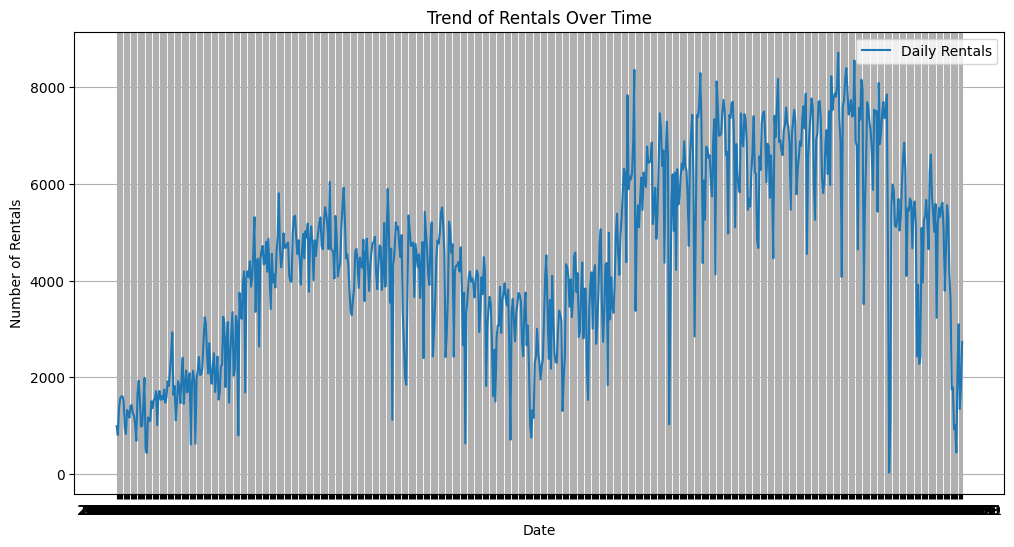

In [ ]:
# Rentals trend over time
plt.figure(figsize=(12, 6))
plt.plot(day_df['dteday'], day_df['cnt'], label='Daily Rentals')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.title('Trend of Rentals Over Time')
plt.legend()
plt.grid()
plt.show()


**Insight:**
- Penyewaan sepeda meningkat selama musim gugur dan panas, yang mungkin disebabkan oleh cuaca yang lebih nyaman.

### Pertanyaan 4: Distribusi penyewaan sepeda per jam

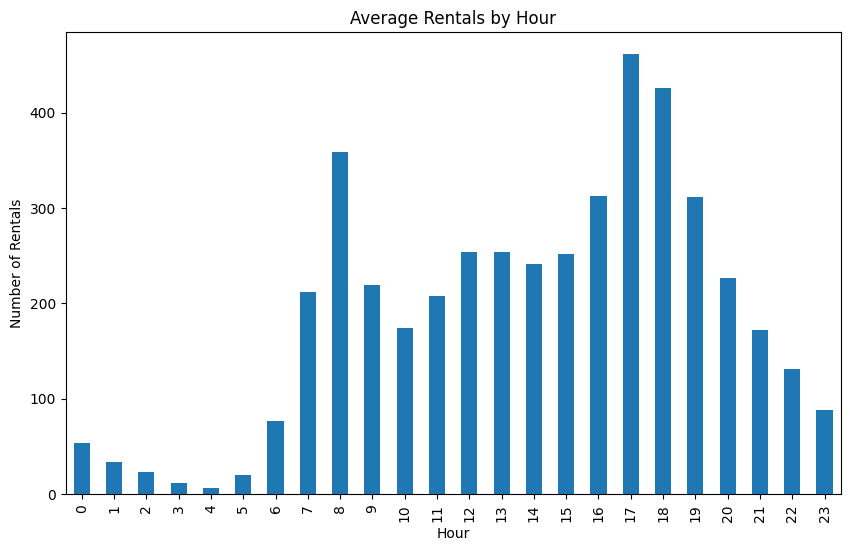

In [ ]:
# Group by hour to analyze rental patterns
hourly_data = hour_df.groupby('hr')['cnt'].mean()
hourly_data.plot(kind='bar', figsize=(10, 6), title='Average Rentals by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Rentals')
plt.show()

**Insight:**
- Jam sibuk penyewaan sepeda adalah jam 8 pagi (berangkat kerja) dan jam 5 sore (pulang kerja).

## Conclusion

1. Conclution pertanyaan (1)
- Musim gugur memiliki penyewaan tertinggi, menunjukkan pengaruh besar faktor cuaca terhadap aktivitas outdoor.
2. Conclution pertanyaan (2)
- Penyewaan sepeda paling tinggi pada cuaca cerah, sementara kondisi buruk (hujan salju berat) mengurangi penyewaan.
3. Conclution pertanyaan (3)
- Penyewaan sepeda meningkat selama musim gugur dan panas, yang mungkin disebabkan oleh cuaca yang lebih nyaman.
4. Conclution pertanyaan (4)
- Jam sibuk penyewaan adalah pada jam 8 pagi dan jam 5 sore, menunjukkan pola penggunaan terkait aktivitas kerja.